# Projeto - Ciência de Dados

### 1º Passo - Análise dos dados

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("car_prices.csv")

print(df.head())
print(df.info())
print(df.describe())

print("\nValores nulos ou ausentes por coluna:")
print(df.isnull().sum())


   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

#### Análise das Variáveis

| Nome          | Tipo      | Descrição |
|---------------|-----------|-----------|
| year          | int64     |Ano de fabricação do veículo|
| make          | object    |Marca do veículo|
| model         | object    |Modelo do veículo|
| trim          | object    |Versão do modelo do veículo|
| body          | object    |Tipo de carroceria do veículo|
| transmission  | object    |Tipo de transmissão do veículo|
| vin           | object    |Número de Identificação do Veículo (VIN)|
| state         | object    |Estado de registro do veículo|
| condition     | float64   |Classificação da condição do veículo|
| odometer      | float64   | Quilometragem do veículo |
| color         | object    |Cor exterior do veículo |
| interior      | object    |Cor interior do veículo|
| seller        | object    |Informação do vendedor|
| mmr           | float64   |Valores do Manheim Market Report|
| sellingprice  | float64   |Preço de venda do veículo|
| saledate      | object    |Data de venda do veículo|

### 2º Passo - Visualização dos Dados

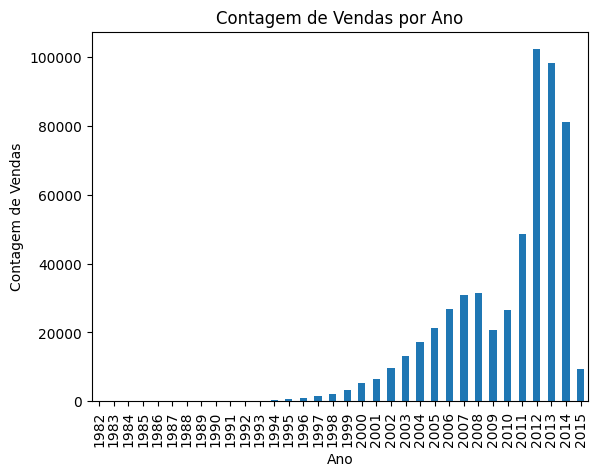

In [67]:
df.groupby("year").size().plot(kind="bar")
plt.title("Contagem de Vendas por Ano")
plt.xlabel("Ano")
plt.ylabel("Contagem de Vendas")
plt.show()

Podemos verificar que a maior parte das vendas foram realizadas entre 2012 e 2014

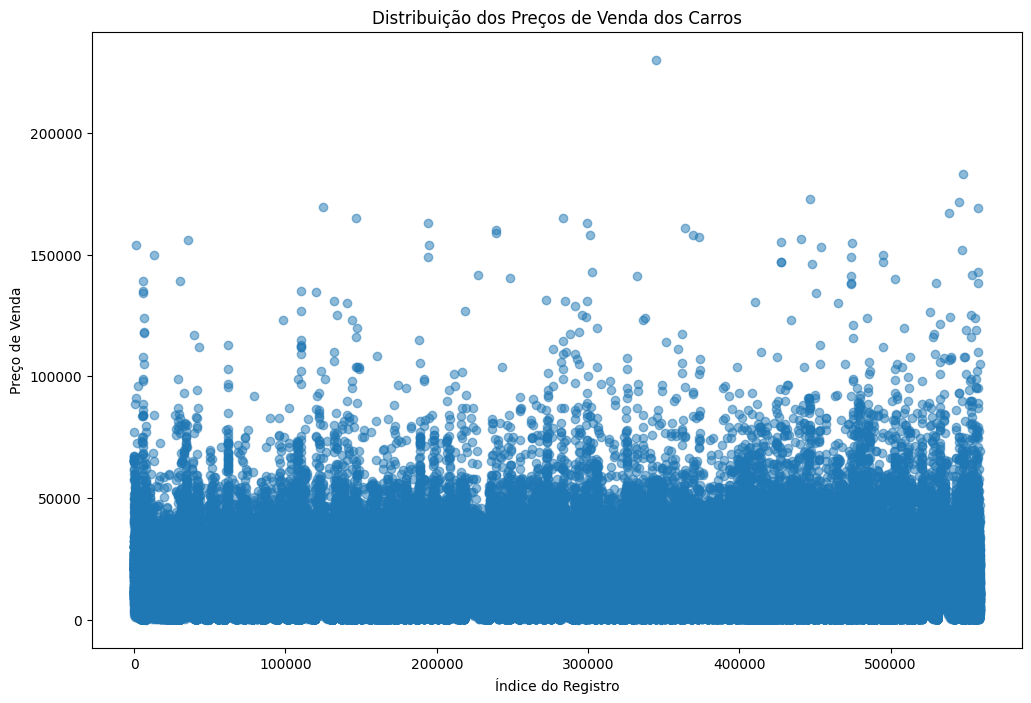

In [68]:
plt.figure(figsize=(12, 8))

plt.scatter(df.index, df["sellingprice"], alpha=0.5)
plt.title("Distribuição dos Preços de Venda dos Carros")
plt.xlabel("Índice do Registro")
plt.ylabel("Preço de Venda")
plt.show()

A maior parte dos carros vendidos foram na faixa do 0 aos 50k

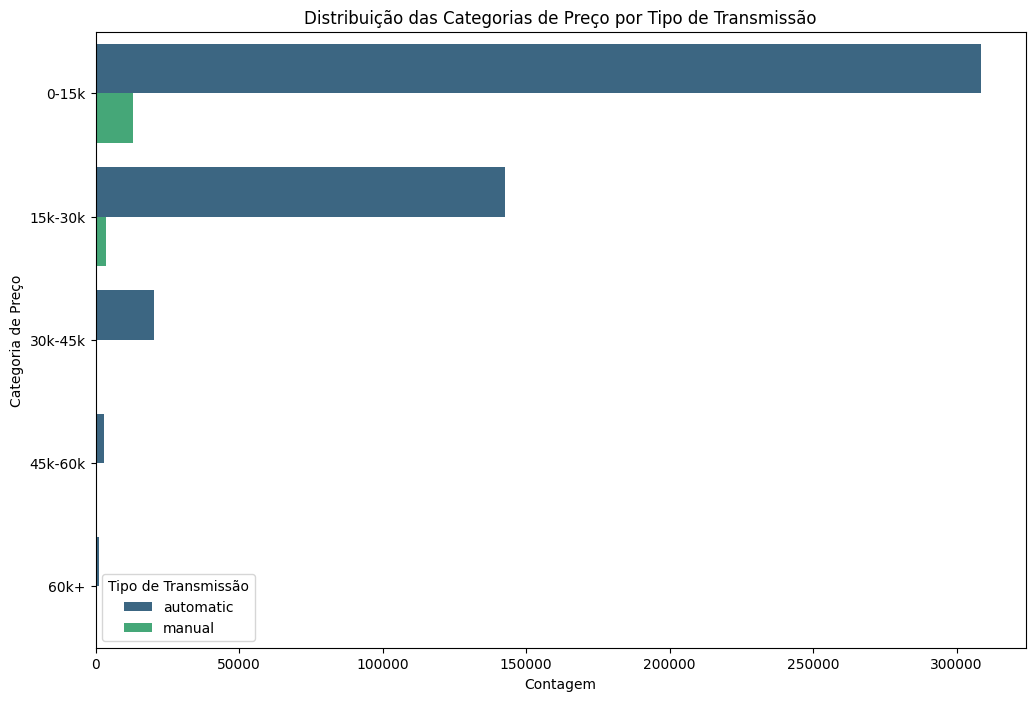

In [69]:
# Filtrar o DataFrame para incluir apenas 'manual' e 'automatic' na coluna 'transmission'
df_filtered = df[df["transmission"].isin(["manual", "automatic"])].copy()

# Categorizar os preços de venda em 5 categorias com intervalos de 15.000
bins = [0, 15000, 30000, 45000, 60000, float("inf")]
labels = ["0-15k", "15k-30k", "30k-45k", "45k-60k", "60k+"]
df_filtered["price_category"] = pd.cut(df_filtered["sellingprice"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 8))

# Contar as combinações de categorias de preços e tipos de transmissão
counts = df_filtered.groupby(["transmission", "price_category"], observed=False).size().reset_index(name="count")

sns.barplot(x="count", y="price_category", hue="transmission", data=counts, palette="viridis")
plt.title("Distribuição das Categorias de Preço por Tipo de Transmissão")
plt.xlabel("Contagem")
plt.ylabel("Categoria de Preço")
plt.legend(title="Tipo de Transmissão")
plt.show()

Podemos verificar que a maior parte dos carros vendidos são automáticos na faixa dos 0 aos 15k

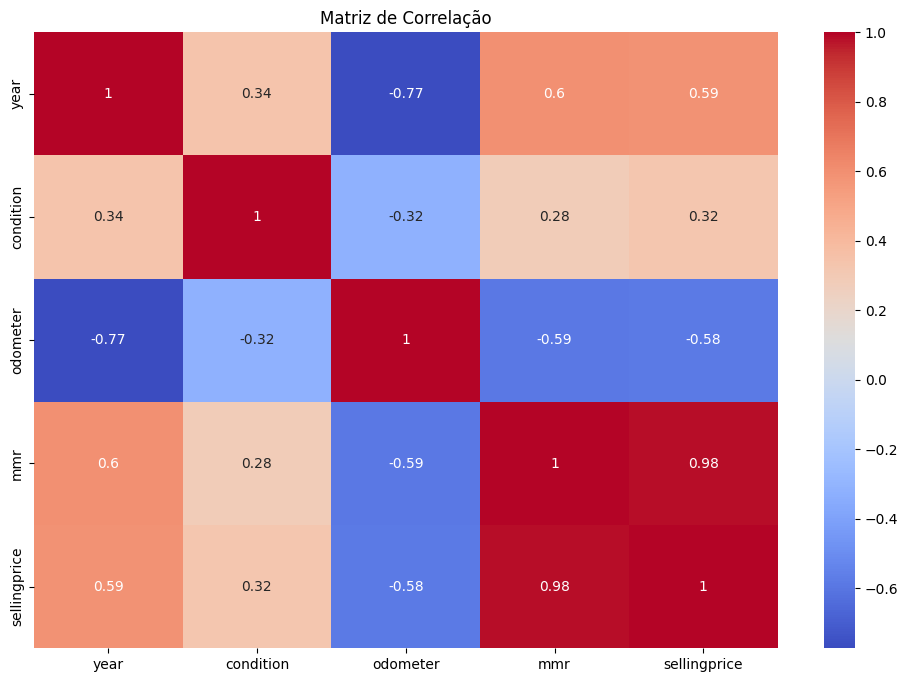

In [70]:
# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcula a matriz de correlação
correlation_matrix = numeric_df.corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Podemos verificar que existem variáveis com elevados níveis de correlação, existindo também variáveis com correlação positiva e negativa

### 3º Passo - Limpeza dos Dados

In [71]:
# Limpeza das colunas condition, odometer e sellingprice através da eliminação de linhas com valores em falta
df = df.dropna(subset=["condition", "odometer", "sellingprice"])

### 4º Passo - Preparação dos Dados

In [72]:
# Normalização dos dados
scale = StandardScaler()

X = df[["odometer", "year", "condition", "mmr"]]
y = df["sellingprice"]

X = scale.fit_transform(X)

# Separar os dados em conjutos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5º Passo - Aplicação de modelos

#### Random Forest

In [73]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest MSE: 3022753.3306974447
Random Forest R^2: 0.9681755867619253


Podemos verificar que a métrica MSE não é muito elevada e que a métrica R^2 se encontra perto de 1, concluindo que o modelo está a fazer boas previsões

#### Gradient Boost

In [74]:
gb_model = GradientBoostingRegressor(n_estimators=250, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)

print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R^2: {r2_gb}")

Gradient Boosting MSE: 2234953.315118946
Gradient Boosting R^2: 0.9764697710706882


Podemos verificar que as métricas apresentam melhores resultados, MSE ainda mais reduzido e o R^2 muito perto de 1

### 6º Passo - Visualização dos Resultados

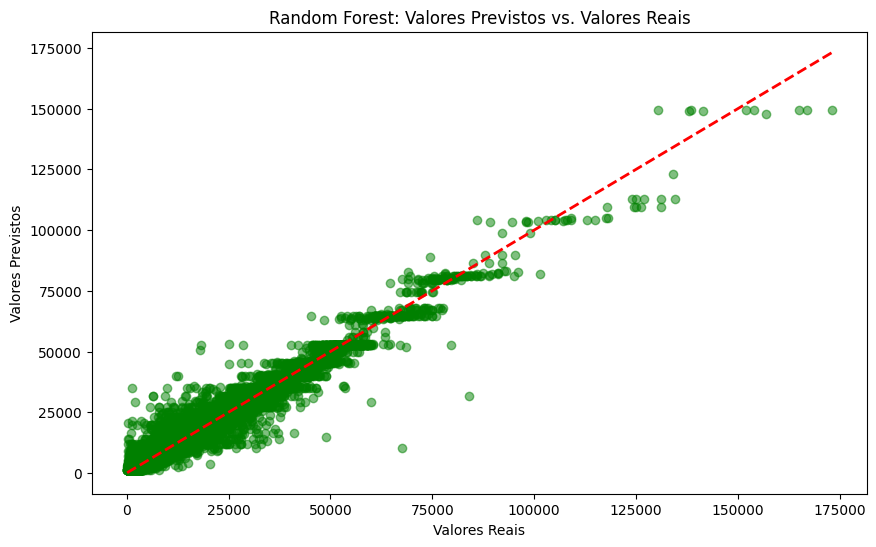

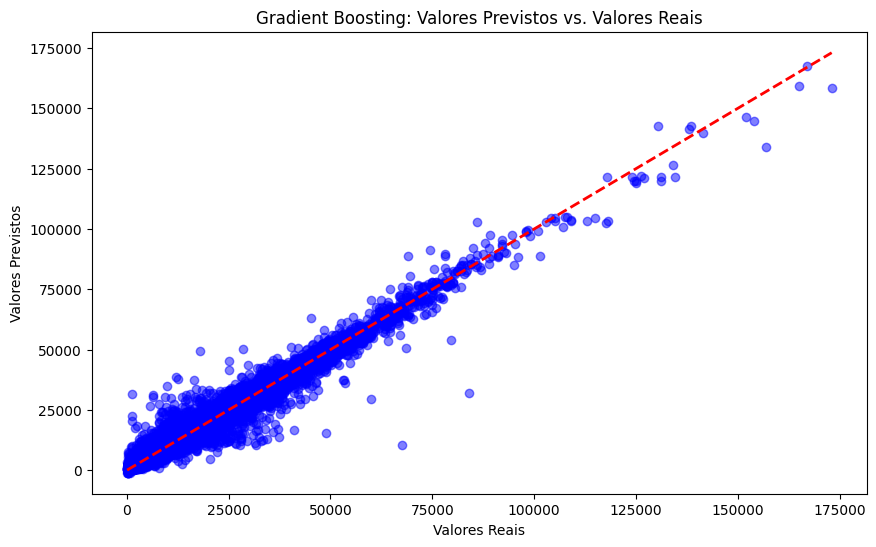

In [75]:
# Previsões dos modelos
y_pred_gb = gb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Random Forest: Valores Previstos vs. Valores Reais')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gradient Boosting: Valores Previstos vs. Valores Reais')
plt.show()

Podemos observar que os dados previstos estão muito próximos dos dados reais pelo declive da reta, um indicativo que os modelos estão a fazer previsões corretas

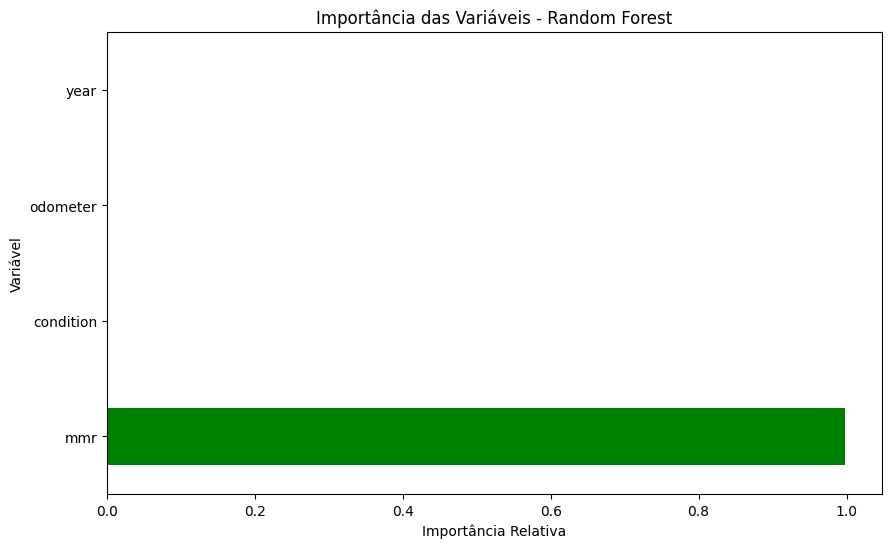

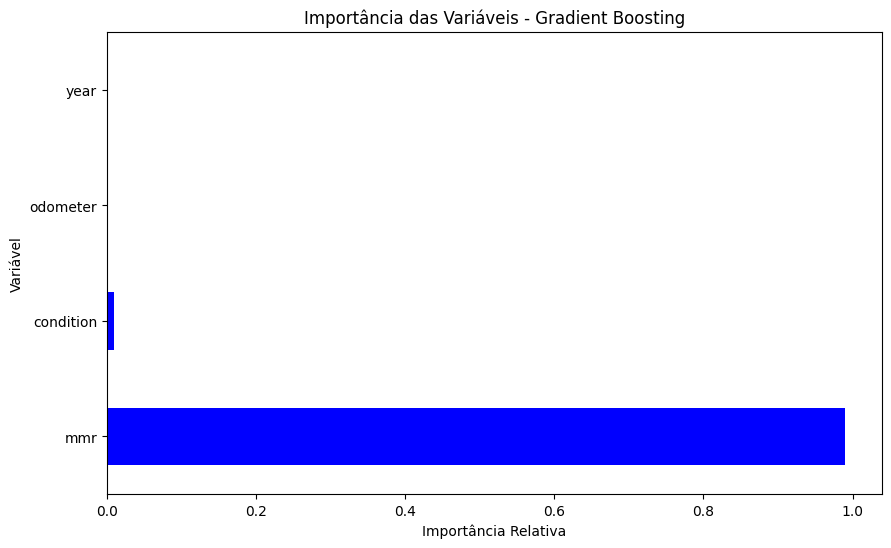

In [76]:
original_columns = ["odometer", "year", "condition", "mmr"]

# Importância das variáveis para Random Forest
feat_importances_rf = pd.Series(rf_model.feature_importances_, index=original_columns)
feat_importances_rf.nlargest(10).plot(kind='barh', color='green', figsize=(10, 6))
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância Relativa')
plt.ylabel('Variável')
plt.show()

# Importância das variáveis para Gradient Boosting
feat_importances_gb = pd.Series(gb_model.feature_importances_, index=original_columns)
feat_importances_gb.nlargest(10).plot(kind='barh', color='blue', figsize=(10, 6))
plt.title('Importância das Variáveis - Gradient Boosting')
plt.xlabel('Importância Relativa')
plt.ylabel('Variável')
plt.show()

Podemos concluir que a variável mais influente é o mmr, seguida da condition. Observamos também que em comparação ao mmr, as restantes variáveis, têm pouca influência

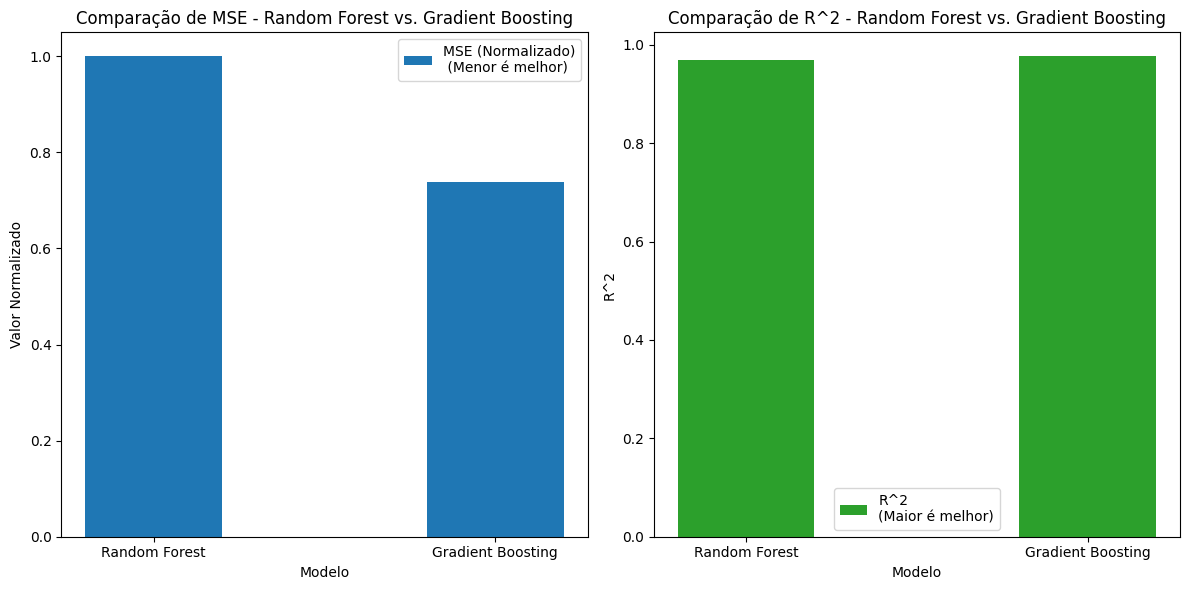

In [77]:
# Criar DataFrame com os dados
metrics = pd.DataFrame({
    'Modelo': ['Random Forest', 'Gradient Boosting'],
    'MSE': [mse_rf, mse_gb],
    'R^2': [r2_rf, r2_gb]
})

# Normalizar MSE para a escala de 0 a 1
metrics['MSE_Normalized'] = metrics['MSE'] / metrics['MSE'].max()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Reduzindo o tamanho da figura

width = 0.4
x = range(len(metrics['Modelo']))

# Plotar MSE normalizado no primeiro subplot (ax1)
ax1.bar(x, metrics['MSE_Normalized'], width, label='MSE (Normalizado)\n (Menor é melhor)', color='tab:blue')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Valor Normalizado')
ax1.set_title('Comparação de MSE - Random Forest vs. Gradient Boosting')
ax1.set_xticks([p for p in x])
ax1.set_xticklabels(metrics['Modelo'])
ax1.legend(loc='best')

# Plotar R^2 no segundo subplot (ax2)
ax2.bar(x, metrics['R^2'], width, label='R^2\n(Maior é melhor)', color='tab:green')
ax2.set_xlabel('Modelo')
ax2.set_ylabel('R^2')
ax2.set_title('Comparação de R^2 - Random Forest vs. Gradient Boosting')
ax2.set_xticks([p for p in x])
ax2.set_xticklabels(metrics['Modelo'])
ax2.legend(loc='best')

plt.tight_layout()  # Garante que não haja sobreposição entre os subplots
plt.show()